In [477]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [478]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [479]:
df.duplicated().sum()

1

In [480]:
df.drop_duplicates(inplace=True)

In [481]:
df.duplicated().sum()

0

In [482]:
x = df.drop("target", axis=1)
y = df["target"]

In [483]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [484]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [485]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [486]:
# y_pred_prob = model.predict_proba(x_test)
y_pred = model.predict(x_test)
print(f"acc = {accuracy_score(y_test, y_pred)*100:.2f}%")

acc = 81.97%


conf matrix


<AxesSubplot: >

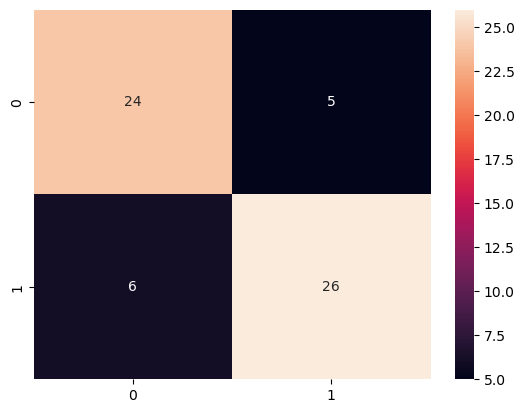

In [487]:
print("conf matrix")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [488]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [489]:
df.drop("deck", axis=1, inplace=True)
df.drop("adult_male", axis=1, inplace=True)

df["family_size"] = df["sibsp"] + df["parch"]

df.drop("sibsp", axis=1, inplace=True)
df.drop("parch", axis=1, inplace=True)

df.drop("alone", axis=1, inplace=True)
df.drop("who", axis=1, inplace=True)
df.drop("embarked", axis=1, inplace=True)
df.drop("class", axis=1, inplace=True)
df.drop("alive", axis=1, inplace=True)
df.drop("embark_town", axis=1, inplace=True)


df["age"].fillna(df["age"].mean(), inplace=True)
df.drop_duplicates()

df.head()


,survived,pclass,sex,age,fare,family_size
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


In [490]:
x = df.drop("survived", axis=1)
y = df["survived"]

In [491]:
x = x.replace("male", 0)
x = x.replace("female", 1)

x.head()

,pclass,sex,age,fare,family_size
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [492]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [493]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [494]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [495]:
y_pred = model.predict(x_test)
print(f"acc = {accuracy_score(y_test, y_pred)*100:.2f}%")

acc = 80.45%


conf matrix


<AxesSubplot: >

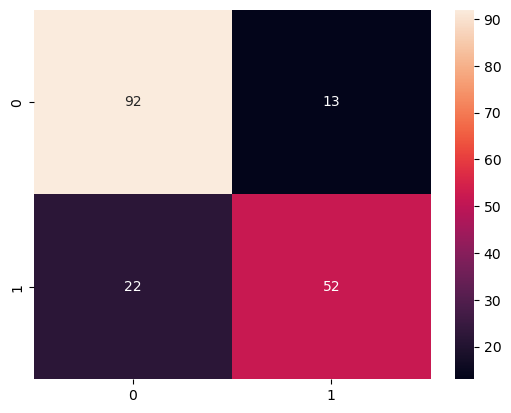

In [496]:
print("conf matrix")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")